In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv('./Cleaned-Data.csv')
dataset.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [4]:
# unificamos todos los campos(todas las carácteristicas) en objetos como lo estipula el Raw-Data.csv
x = pd.DataFrame(columns=['Age', 'Symptoms', 'Experiencing_Symptoms', 'Gender', 'Contact'])

def unificar_sintomas(row):
    if row['Fever'] == 1:
        return 'Fever'
    elif row['Tiredness'] == 1:
        return 'Tiredness'
    elif row['Dry-Cough'] == 1:
        return 'Dry-Cough'
    elif row['Difficulty-in-Breathing'] == 1:
        return 'Difficulty-in-Breathing'
    elif row['Sore-Throat'] == 1:
        return 'Sore-Throat'
    elif row['None_Sympton'] == 1:
        return 'None_Sympton'
    else:
        return 'Unknown'

x['Symptoms'] = dataset.apply(unificar_sintomas, axis=1)

def unificar_sintomas(row):
    if row['Pains'] == 1:
        return 'Pains'
    elif row['Nasal-Congestion'] == 1:
        return 'Nasal-Congestion'
    elif row['Runny-Nose'] == 1:
        return 'Runny-Nose'
    elif row['Diarrhea'] == 1:
        return 'Diarrhea'
    elif row['None_Experiencing'] == 1:
        return 'None_Experiencing'
    else:
        return 'Unknown' 

x['Experiencing_Symptoms'] = dataset.apply(unificar_sintomas, axis=1)

def unificar_edad(row):
    if row['Age_0-9'] == 1:
        return '0-9'
    elif row['Age_10-19'] == 1:
        return '10-19'
    elif row['Age_20-24'] == 1:
        return '20-24'
    elif row['Age_25-59'] == 1:
        return '25-59'
    elif row['Age_60+'] == 1:
        return '60+'
    else:
        return 'Unknown'

x['Age'] = dataset.apply(unificar_edad, axis=1)

def unificar_genero(row):
    if row['Gender_Female'] == 1:
        return 'Female'
    elif row['Gender_Male'] == 1:
        return 'Male'
    elif row['Gender_Transgender'] == 1:
        return 'Transgender'
    else:
        return 'Unknown' 

x['Gender'] = dataset.apply(unificar_genero, axis=1)

def unificar_contacto(row):
    if row['Contact_Dont-Know'] == 1:
        return 'Contact_Dont-Know'
    elif row['Contact_No'] == 1:
        return 'Contact_No'
    elif row['Contact_Yes'] == 1:
        return 'Contact_Yes'
    else:
        return 'Unknown' 

x['Contact'] = dataset.apply(unificar_contacto, axis=1)

x['Country'] = dataset['Country']

# convertimos todas las columnas a valores nominales

le = LabelEncoder()


x['Age'] = le.fit_transform(x['Age'])
x['Symptoms'] = le.fit_transform(x['Symptoms'])
x['Experiencing_Symptoms'] = le.fit_transform(x['Experiencing_Symptoms'])
x['Gender'] = le.fit_transform(x['Gender'])
x['Contact'] = le.fit_transform(x['Contact'])
x['Country'] = le.fit_transform(x['Country'])

# se crea un campo o columna llamado "Severity" 
# este campo será nuestra variable objetivo de todas las carácteristicas
def asignar_severidad(row):
    if row['Severity_Mild'] == 1:
        return 'Mild'
    elif row['Severity_Moderate'] == 1:
        return 'Moderate'
    elif row['Severity_None'] == 1:
        return 'None'
    elif row['Severity_Severe'] == 1:
        return 'Severe'
    else:
        return 'None'
    
y = dataset.apply(asignar_severidad, axis=1)

dataset.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+','Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Contact_Dont-Know', 'Contact_No', 'Contact_Yes'], axis=1, inplace=True)

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Age                    316800 non-null  int64
 1   Symptoms               316800 non-null  int64
 2   Experiencing_Symptoms  316800 non-null  int64
 3   Gender                 316800 non-null  int64
 4   Contact                316800 non-null  int64
 5   Country                316800 non-null  int64
dtypes: int64(6)
memory usage: 14.5 MB


In [5]:
# se crea el objeto DecisionTreeClassifier y se ejecuta el entrenamiento con los x,y calculados
arbol = DecisionTreeClassifier()

classifier = arbol.fit(x,y)

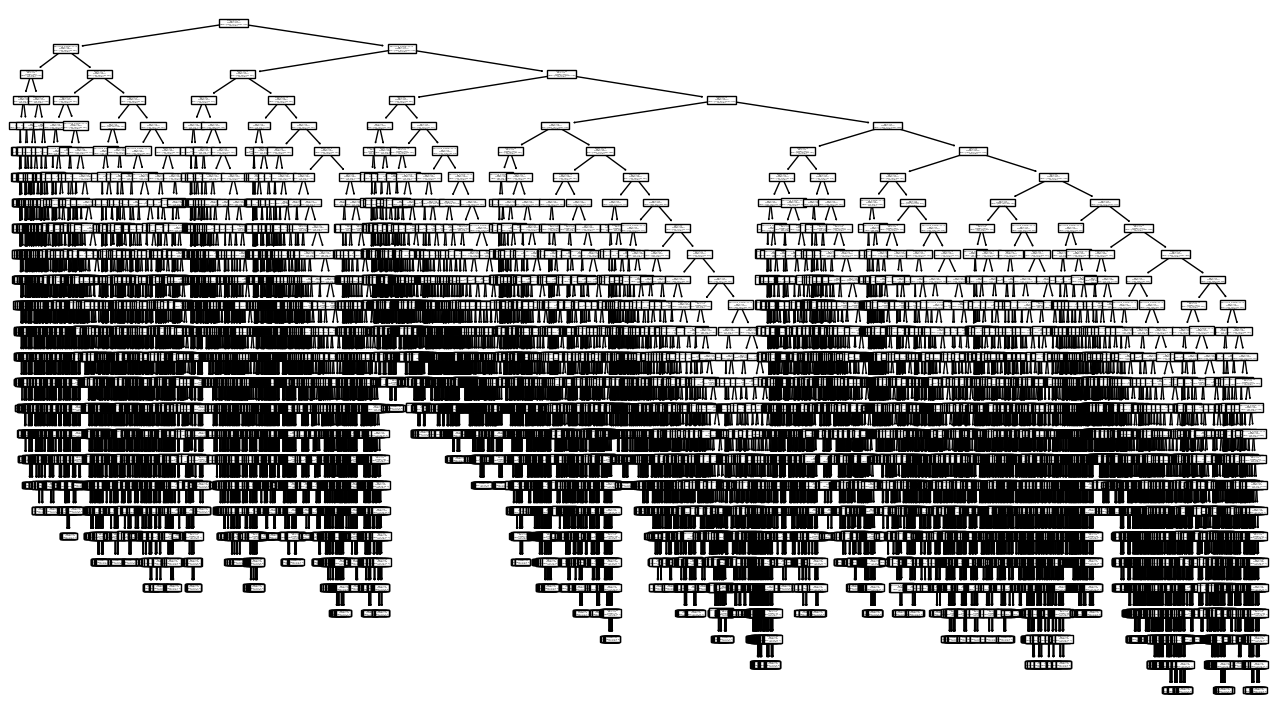

In [6]:
feature_names = list(map(str, x.columns.values))
class_names = list(map(str, y.unique()))

fig = plt.figure(figsize=(16, 9))
tree.plot_tree(arbol, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [7]:
# Contamos la cantidad de nodos calculados
arbol.tree_.node_count

26999